# 연습문제
    - 05-2.Education.csv 파일
    - 구분 : 1:'재학생', 2:'교원'
    - 1. 기술통계량
    - 2. 종합점수 차이가 있는지 검정 및 그래프 그리기
    - 3. 차이가 있다면 등분산, 정규분포 검정
    - 4. 만약에 이분산이거나, 비모수이면 다른 검정
    - 이상치가 있다면 제거

## 설정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [3]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [4]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [32]:
edu_df = pd.read_csv('./data/05_2.Education.csv', encoding = 'cp949')
edu_df.head()

,번호,구분,종합점수
0,1,1,80.0
1,2,1,70.0
2,3,1,80.0
3,4,1,70.0
4,5,1,56.6


In [33]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      100 non-null    int64  
 1   구분      100 non-null    int64  
 2   종합점수    100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [34]:
edu_df['구분'].replace({1:'재학생', 2:'교원'}, inplace=True)
edu_df['구분'] = edu_df['구분'].astype('category')

edu_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7116\1909291540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edu_df['구분'].replace({1:'재학생', 2:'교원'}, inplace=True)


,번호,구분,종합점수
0,1,재학생,80.0
1,2,재학생,70.0
2,3,재학생,80.0
3,4,재학생,70.0
4,5,재학생,56.6


## 이상치 제거

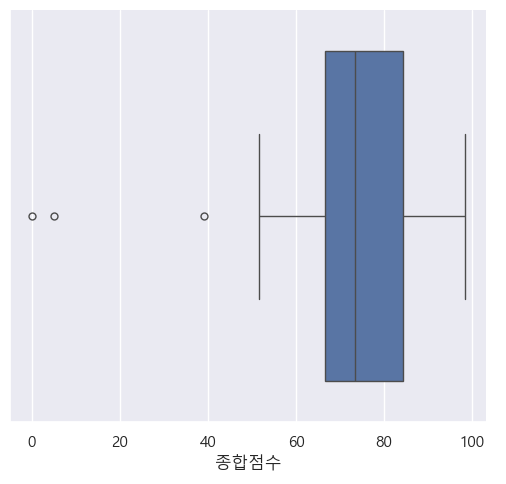

In [35]:
sns.catplot(data = edu_df,
            x = '종합점수',
            kind = 'box')

In [36]:
filter = (edu_df['종합점수'] <= 40)
edu_df.loc[filter]

,번호,구분,종합점수
9,10,재학생,5.0
41,42,재학생,0.0
69,70,교원,39.1


In [37]:
edu_df.drop(edu_df[filter].index, inplace=True)

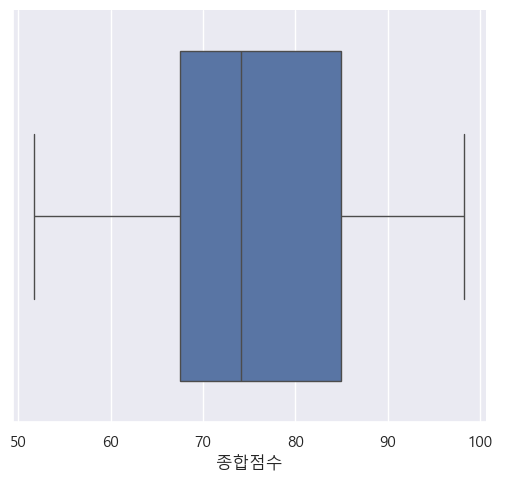

In [38]:
sns.catplot(data = edu_df,
            x = '종합점수',
            kind = 'box')

## 1. 기술통계량

In [39]:
edu_df.groupby('구분')['종합점수'].describe().round(3)

C:\Users\user\AppData\Local\Temp\ipykernel_7116\2737150273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_df.groupby('구분')['종합점수'].describe().round(3)


,count,mean,std,min,25%,50%,75%,max
구분,,,,,,,,
교원,49.0,79.324,11.465,56.6,70.800,80.8,87.500,98.3
재학생,48.0,71.312,11.322,51.7,65.175,70.0,79.325,95.8


## 2. 검정 및 그래프 그리기

In [40]:
# t-test
# 차이가 있는 경우

x = edu_df['종합점수'][edu_df['구분'] == '재학생']
y = edu_df['종합점수'][edu_df['구분'] == '교원']

pg.ttest(x,y,
         paired = False, # 서로 독립적인 집단
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.462,95,two-sided,0.001,"[-12.61, -3.42]",0.703,35.774,0.929


p값이 0.002 < 0.05 ; 귀무가설 기각. 재학생과 교원의 종합점수에는 차이가 있다.

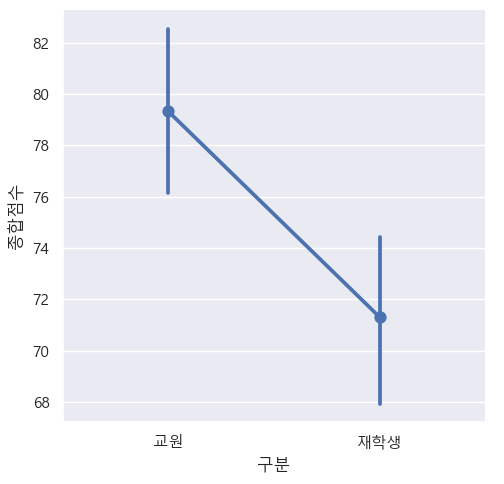

In [41]:
# 그래프

sns.catplot(x = "구분",
            y = "종합점수",
            kind = "point",
            data = edu_df)
plt.show()

## 3. 등분산 검정

In [42]:
pg.homoscedasticity(edu_df,
                    dv = '종합점수',
                    group =  '구분') # 종속 변수 dependent valiable

,W,pval,equal_var
levene,0.230603,0.632181,True


등분산 True

## 4. 정규성 검정

In [43]:
# 정규성 검정

pg.normality(edu_df,
             dv = '종합점수',
             group = '구분')

,W,pval,normal
구분,,,
재학생,0.968763,0.226627,True
교원,0.967480,0.191839,True


정규성 True (이상치 제거를 하지 않을 시 재학생의 정규성 검증이 False이다.)

따라서 교원과 재학생 사이에는 차이가 있다.